In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
from matplotlib import rcParams

%matplotlib inline 

In [58]:
rc('text', usetex=True)
rcParams['backend'] = 'ps' # optional
rcParams['text.latex.preamble'] = ['\usepackage{gensymb}'] # optional
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 20
rc('font', **{'family':'serif', 'serif':['Computer Modern'],
       'monospace': ['Computer Modern Typewriter']})

In [72]:
def mobius_add(x, y, c):
    xy = np.sum(x*y, 1, keepdims=1)
    x2 = np.sum(x*x, 1, keepdims=1)
    y2 = np.sum(y*y, 1, keepdims=1)
    num = (1 + 2*c*xy+c*y2) * x + (1-c*x2) * y
    den = 1 + 2*c*xy + (c**2)*x2*y2
    return num / den

def mobius_mul(x, t, c):
    normx = np.sqrt(np.sum(x*x, 1, keepdims=1))
    return (1./np.sqrt(c)) * np.tanh(t * np.arctanh(np.sqrt(c)*normx)) * x / normx

def geodesic_fn(x, y, t, c):
    x_rep = np.repeat(x.reshape((1, -1)), len(t), 0)
    y_rep = np.repeat(y.reshape((1, -1)), len(t), 0)
    t1 = mobius_add(-x_rep, y_rep, c)
    t2 = mobius_mul(t1, t.reshape((-1, 1)), c)
    return mobius_add(x_rep, t2, c)

def scalar_mobius_add(x, y, c):
    xy = np.sum(x*y)
    x2 = np.sum(x*x)
    y2 = np.sum(y*y)
    num = (1 + 2*c*xy+c*y2) * x + (1-c*x2) * y
    den = 1 + 2*c*xy + (c**2)*x2*y2
    return num / den

def scalar_mobius_mul(x, t, c):
    normx = np.linalg.norm(x)
    return (1./np.sqrt(c)) * np.tanh(t * np.arctanh(np.sqrt(c)*normx)) * x / normx

def dist_fn(x, y, c): 
    return (2./np.sqrt(c)) * np.arctanh(np.sqrt(c) * np.linalg.norm(scalar_mobius_add(-x, y, c)))

def expmap0(u, c):
    sqrt_c = c ** 0.5
    u_norm = np.linalg.norm(u)
    gamma_1 = np.tanh(sqrt_c * u_norm) * u / (sqrt_c * u_norm)
    return gamma_1

def parallel_fn(x, u, t, c):
    source = x 
    target = scalar_mobius_add(x, expmap0(u, c), c)
    return geodesic_fn(source, target, t, c)

def set_figure(name, radius=1, circle=True):
    pp = PdfPages(name)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1)
    if circle:
        circ = plt.Circle((0, 0), radius=radius, edgecolor='gray', facecolor='None')
        ax.add_patch(circ)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    return pp, ax

In [61]:
## config 
seed = np.random.randint(100)
print(seed)
np.random.seed(seed)
e1 = np.array((1, 0))
e2 = np.array((0, 1))
radius = 1
c = 1
n_max = 15
nb_points = 100
r_vals = np.linspace(-radius+0.1, radius-0.1, n_max)
theta_min = np.arctan(u[1]/u[0])
theta_vals = np.linspace(theta_min, 2 * np.pi+theta_min, n_max)
theta = np.pi * 0.4
u = 0.06 *  (np.cos(theta) * e1 + np.sin(theta) * e2)
u_norm = u / np.linalg.norm(u)

19


## Translations

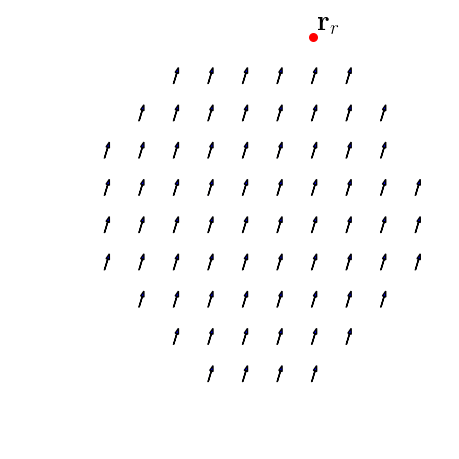

In [79]:
pp, ax = set_figure('euc_translation.pdf', circle=False)
x_vals = np.linspace(-radius+0.1, radius-0.1, 10)
y_vals = np.linspace(-radius+0.1, radius-0.1, 10)
for x in x_vals:
    for y in y_vals:
        source = x * e1 + y * e2 
        target = source + u
        if np.linalg.norm(target) < radius - 0.04 and np.linalg.norm(source) < radius - 0.04:
            plt.arrow(source[0], source[1], target[0]-source[0], target[1]-source[1])
plt.scatter([u_norm[0]], u_norm[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}_r$', (u_norm[0]+0.02, u_norm[1]+0.02))
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight') # transparent = True
pp.close()

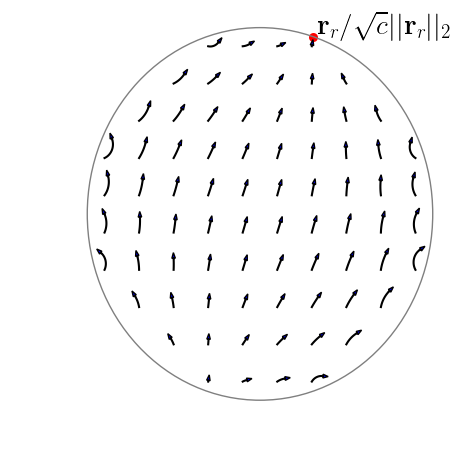

In [70]:
nb_points = 100
k = 10
t_vals = np.linspace(0, 1, nb_points)
pp, ax = set_figure('hyp_translation.pdf')
nb_points = 100
theta_vals = np.linspace(0, 2 * np.pi, 10)
x_vals = np.linspace(-radius+0.1, radius-0.1, 10)
y_vals = np.linspace(-radius+0.1, radius-0.1, 10)
for x in x_vals:
    for y in y_vals:
        source = x * e1 + y * e2 
        target = scalar_mobius_add(expmap0(u, c), source, c)
        if np.linalg.norm(target) < radius - 0.04 and np.linalg.norm(source) < radius - 0.04:
            points = geodesic_fn(source, target, t_vals, c=c)
            ax.plot(points[:, 0], points[:, 1], color='black', linewidth=1.5, alpha=1)
            plt.arrow(points[-k, 0], points[-k, 1], -points[-k, 0]+points[-1, 0], -points[-k, 1]+points[-1, 1])
            #plt.arrow(source[0], source[1], target[0]-source[0], target[1]-source[1])
plt.scatter([u_norm[0]], u_norm[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}_r/\sqrt{c}||\mathbf{r}_r||_2$', (u_norm[0]+0.02, u_norm[1]))
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

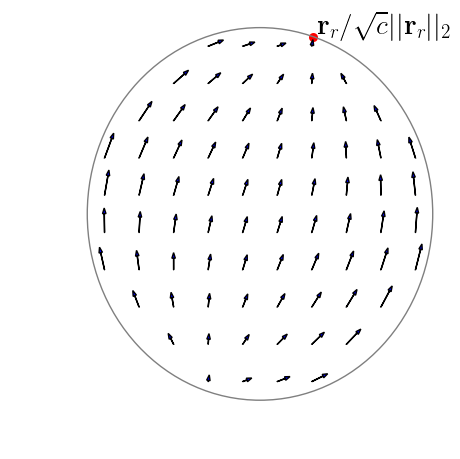

In [33]:
pp, ax = set_figure('hyp_translation.pdf')
nb_points = 100
theta_vals = np.linspace(0, 2 * np.pi, 10)
x_vals = np.linspace(-radius+0.1, radius-0.1, 10)
y_vals = np.linspace(-radius+0.1, radius-0.1, 10)
for x in x_vals:
    for y in y_vals:
        source = x * e1 + y * e2 
        target = scalar_mobius_add(expmap0(u, c), source, c)
        if np.linalg.norm(target) < radius - 0.04 and np.linalg.norm(source) < radius - 0.04:
            plt.arrow(source[0], source[1], target[0]-source[0], target[1]-source[1])
plt.scatter([u_norm[0]], u_norm[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}_r/\sqrt{c}||\mathbf{r}_r||_2$', (u_norm[0]+0.02, u_norm[1]))
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

## Rotations

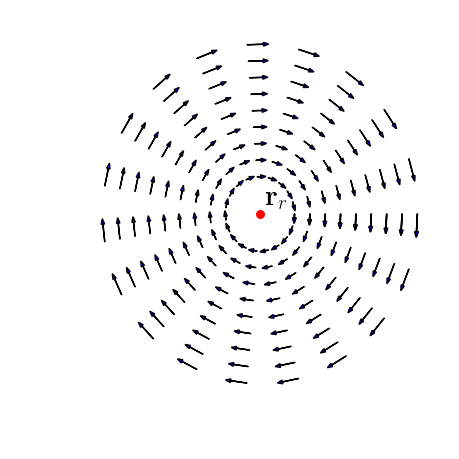

In [78]:
pp, ax = set_figure('euc_rotation.pdf', circle=False)
nb_points = 100
center = np.array([0., 0.])
theta = np.pi / 30
center_r = np.sqrt(center[0]**2 + center[1]**2)
rot_mat = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
#r_vals = np.linspace(-radius-r_center+0.1, radius+r_center-0.1, 30)
r_vals = np.linspace(0.2, 1 + center_r, 10)
theta_vals = np.linspace(0, 2 * np.pi, 20)
for r in r_vals:
    for theta in theta_vals:
        source = r * np.cos(theta) * e1 
        source += r * np.sin(theta) * e2 
        source += center
        x1 = source - center
        x1_rot = rot_mat.dot(x1) 
        target = center + x1_rot
        r_target = np.sqrt(target[0]**2 + target[1]**2)
        r_source = np.sqrt(source[0]**2 + source[1]**2)
        if r_target < radius - 0.02 and r_source < radius  - 0.02: 
            plt.arrow(source[0], source[1], target[0]-source[0], target[1]-source[1])
plt.scatter([center[0]], center[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}_r$', center + 0.03)
#ax.set_title('$\psi_{\mathbf{r}}(\mathbf{h})=\mathrm{exp}^c_\mathbf{0}(\mathbf{r})\oplus^c\mathbf{h}$')
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

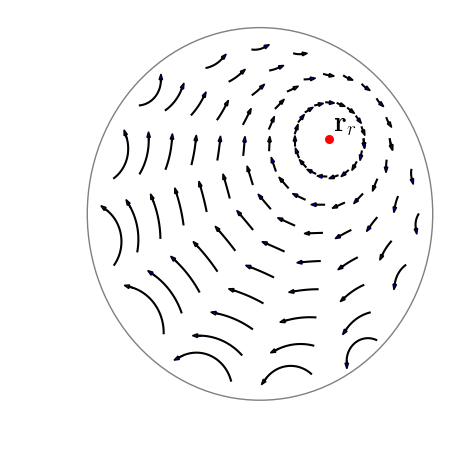

In [87]:
pp, ax = set_figure('hyp_rotation.pdf')
nb_points = 100
center = np.array([0.4, 0.4])
theta = np.pi / 30
center_r = np.sqrt(center[0]**2 + center[1]**2)
rot_mat = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
#r_vals = np.linspace(-radius-r_center+0.1, radius+r_center-0.1, 30)
r_vals = np.linspace(0.2, 1 + center_r, 10)
theta_vals = np.linspace(0, 2 * np.pi, 20)
for r in r_vals:
    for theta in theta_vals:
        source = r * np.cos(theta) * e1 
        source += r * np.sin(theta) * e2 
        source += center
        current_r = np.sqrt(source[0]**2 + source[1]**2)
        if current_r < radius: 
            x1 = scalar_mobius_add(-center, source, c)
            x1_rot = rot_mat.dot(x1) 
            target = scalar_mobius_add(center, x1_rot, c)
            if np.linalg.norm(target) < radius - 0.05:
                points = geodesic_fn(source, target, t_vals, c=c)
                ax.plot(points[:, 0], points[:, 1], color='black', linewidth=1.5, alpha=1)
                plt.arrow(points[-k, 0], points[-k, 1], -points[-k, 0]+points[-1, 0], -points[-k, 1]+points[-1, 1])
            #plt.arrow(source[0], source[1], target[0]-source[0], target[1]-source[1])
plt.scatter([center[0]], center[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}_r$', center + 0.03)
#ax.set_title('$\psi_{\mathbf{r}}(\mathbf{h})=\mathrm{exp}^c_\mathbf{0}(\mathbf{r})\oplus^c\mathbf{h}$')
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

## Reflections 

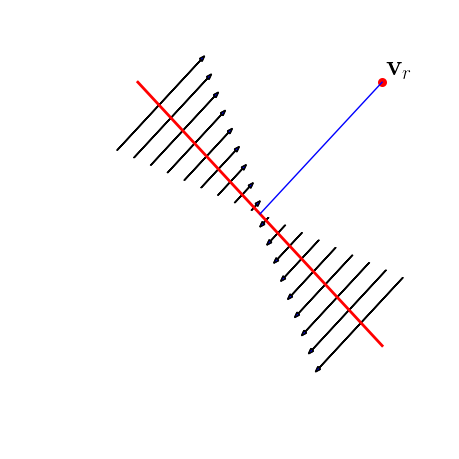

In [86]:
pp, ax = set_figure('euc_reflection.pdf', circle=False)
nb_points = 100
u = np.array([0.4, 0.4])
u /= np.linalg.norm(u)
u = u.reshape((-1, 1))
theta = np.pi / 2
rot_mat = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
v = rot_mat.dot(u)
plt.plot([v[0], -v[0]], [v[1], -v[1]], linewidth=2, color='red')
reflection_mat = np.eye(2) - 2 * u.dot(u.T)
r_vals = np.linspace(- radius,  radius, 20)
alpha = 7 * np.pi / 8
center = np.array([0.4, 0.4])

for r in r_vals:
    for theta in [alpha, alpha + np.pi]:
        source = r * np.cos(theta) * e1 
        source += r * np.sin(theta) * e2 
        current_r = np.sqrt(source[0]**2 + source[1]**2)
        if current_r < radius: 
            #if True:
            target = reflection_mat.dot(source)
            plt.arrow(source[0], source[1], target[0]-source[0], target[1]-source[1])
plt.plot([0, u[0]], [0, u[1]])
#plt.arrow(0, 0, u[0], 0, u[1])
plt.scatter([u[0]], u[1], linewidths=2, color='red')
ax.annotate('$\mathbf{v}_r$', (u[0]+0.02, u[1]+0.02))
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

In [ ]:
(x, u0/u1 x )
u = (u0, u1)

In [50]:
x1

array([ 0.00160176, -0.99999872])

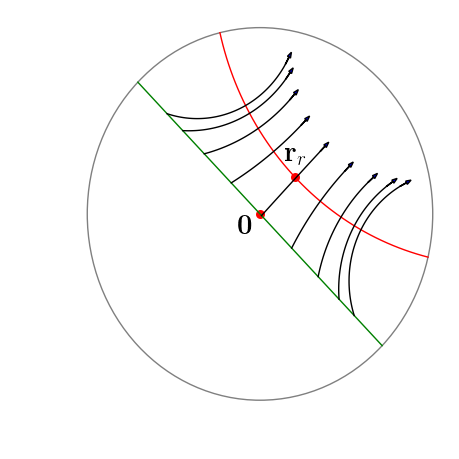

In [129]:
pp, ax = set_figure('hyp_reflection.pdf')
nb_points = 100

theta = np.pi / 4
u = np.array([np.cos(theta), np.sin(theta)])
u = u.reshape((-1, 1))

center = np.array([0.2, 0.2])

x_vals = np.linspace(- np.cos(theta),  np.cos(theta), 50)
y_vals = -u[0] * x_vals / u[1]
x1 = []
x2 = []
for x, y in zip(x_vals, y_vals):
    p = x * e1 + y * e2 
    out = scalar_mobius_add(center, p, c)
    x1.append(out[0])
    x2.append(out[1])
plt.plot(x1, x2, color='red')

source = np.array([-0.6, 0.6])
target = np.array([0.6, -0.6])
#source = np.array([-0.6, 0.2])
#target = np.array([0.2, -0.6])
ct = 1./np.sqrt(2)
plt.plot([-ct, ct], [ct, -ct], color='green')
reflection_mat = np.eye(2) - 2 * u.dot(u.T)
for i in range(1, 10):
    source = points[i * 10]
    x1 = scalar_mobius_add(-center, source, c)
    x1_reflection = reflection_mat.dot(x1) 
    if np.linalg.norm(source) < radius: 
        target = scalar_mobius_add(center, x1_reflection, c)
        vals = geodesic_fn(source, target, t_vals, c=c)
        ax.plot(vals[:, 0], vals[:, 1], color='black', linewidth=1, alpha=1)
        plt.arrow(vals[-k, 0], vals[-k, 1], -vals[-k, 0]+vals[-1, 0], -vals[-k, 1]+vals[-1, 1])

plt.scatter([center[0]], center[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}_r$', (center[0]-0.06, center[1]+0.07))
plt.scatter([0], [0], linewidths=2, color='red')
ax.annotate('$\mathbf{0}$', (-0.125, -0.1))
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()

In [105]:
0.6**2 + 0.6**2


0.72

In [94]:
t_vals.shape

(100,)

## Other methods

/Users/ineschami/emoji/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in arctanh
  # This is added back by InteractiveShellApp.init_path()
/Users/ineschami/emoji/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Users/ineschami/emoji/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
/Users/ineschami/emoji/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
/Users/ineschami/emoji/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arctanh
  # This is added back by InteractiveShellApp.init_path()


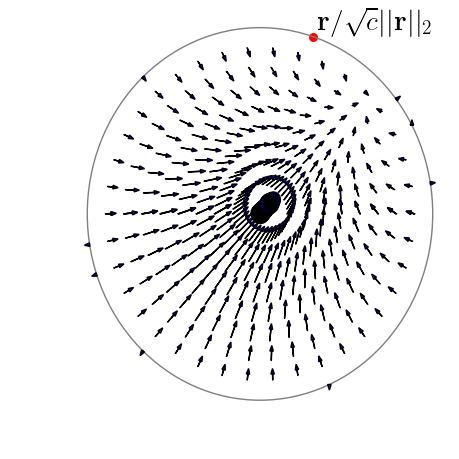

In [39]:
pp, ax = set_figure('limit_geodesic_model.pdf')
limit_point = 0.9 * (np.cos(theta_min) * e1 + np.sin(theta_min) * e2) 
for r in r_vals:
    for theta in theta_vals:
        source = r * np.cos(theta) * e1 + r * np.sin(theta) * e2 
        vals = geodesic_fn(source, limit_point, np.array([0, 0.05]), c)
        plt.arrow(vals[0, 0], vals[0, 1], vals[1, 0]-vals[0, 0], vals[1, 1]-vals[0, 1])
plt.scatter([u_norm[0]], u_norm[1], linewidths=2, color='red')
ax.annotate('$\mathbf{r}/\sqrt{c}||\mathbf{r}||_2$', (u_norm[0]+0.02, u_norm[1]+0.02))
#ax.set_title('$\psi_{\mathbf{r}}(\mathbf{h})=\mathrm{exp}^c_\mathbf{0}(\mathbf{r})\oplus^c\mathbf{h}$')
plt.axis('off')
plt.tight_layout()
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()